# Tests coverage for genetic algorithm for the Courier Problem 

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [26]:
import glob
import json

test_dir = "problems/"
results_dir = "results/"

test_files = glob.glob(f"{test_dir}/*.json")


def get_json_key_lengths(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return {key: len(value) for key, value in data.items()}


tests_summary = []
for f in test_files:
    row = {"filename": f.replace("data/", "").replace(".json", "")}
    row.update(get_json_key_lengths(f))
    tests_summary.append(row)

tests_df = pd.DataFrame(tests_summary)

if "graph" in tests_df.columns:
    tests_df.drop(columns=["graph"], inplace=True)
if "permissions" in tests_df.columns:
    tests_df.drop(columns=["permissions"], inplace=True)

tests_df.sort_values(by="filename", inplace=True)


In [27]:
results_files = glob.glob(f"{results_dir}/*.csv")
results_df = pd.concat([pd.read_csv(f) for f in results_files], ignore_index=True)
results_df.sort_values(by="testcase")

,testcase,mutation_suite,cost_mean,cost_std,cost_max,cost_min,cost_median,iterations_mean,iterations_std,iterations_min,...,time_mean,time_std,time_min,time_max,time_median,cost_func_evals_min,cost_func_evals_max,cost_func_evals_mean,cost_func_evals_std,cost_func_evals_median
159,01-one-courier,"['UsedVehiclesMutation', 'RouteMutation', 'New...",160.20,0.00,160.20,160.20,160.20,104.2,1.25,102,...,1.62,0.13,1.49,1.90,1.57,62,69,65.8,1.89,66.0
157,01-one-courier,"['UsedVehiclesMutation', 'PackagesMutation', '...",160.20,0.00,160.20,160.20,160.20,103.8,1.08,102,...,1.52,0.13,1.32,1.75,1.49,63,67,65.9,1.04,66.0
156,01-one-courier,"['UsedVehiclesMutation', 'CouriersMutation', '...",188.20,0.00,188.20,188.20,188.20,100.0,0.00,100,...,1.09,0.03,1.06,1.13,1.09,50,50,50.0,0.00,50.0
155,01-one-courier,"['UsedVehiclesMutation', 'CouriersMutation', '...",160.20,0.00,160.20,160.20,160.20,104.6,1.91,102,...,1.32,0.05,1.24,1.41,1.34,64,70,66.9,1.58,67.0
154,01-one-courier,"['UsedVehiclesMutation', 'CouriersMutation', '...",188.20,0.00,188.20,188.20,188.20,100.0,0.00,100,...,1.04,0.03,0.99,1.09,1.05,50,50,50.0,0.00,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,05-small,"['UnusedVehiclesMutation', 'PackagesMutation',...",545.64,12.47,578.58,538.04,538.04,110.0,2.72,104,...,1.84,0.06,1.75,1.92,1.84,199,300,258.7,30.10,265.5
226,05-small,"['UnusedVehiclesMutation', 'CouriersMutation',...",980.24,339.15,1590.78,656.62,944.38,128.6,15.67,112,...,2.61,0.34,2.18,3.49,2.52,1047,1517,1228.1,129.49,1226.5
225,05-small,"['UnusedVehiclesMutation', 'CouriersMutation',...",1606.40,25.59,1619.61,1555.25,1619.61,118.8,5.65,108,...,2.09,0.10,1.86,2.21,2.11,437,607,498.6,51.71,492.0
223,05-small,"['UsedVehiclesMutation', 'RouteMutation', 'New...",648.76,74.57,719.26,538.04,685.29,125.1,10.53,111,...,2.37,0.21,2.08,2.73,2.34,571,1034,826.1,130.89,835.0


In [28]:
tests_df.head()

,filename,couriers,vehicles,packages
1,problems/01-one-courier,1,5,5
0,problems/02-four-couriers,4,4,10
3,problems/03-big,20,30,40
4,problems/04-medium,7,10,15
2,problems/05-small,20,5,5


In [29]:
results_df.head()

,testcase,mutation_suite,cost_mean,cost_std,cost_max,cost_min,cost_median,iterations_mean,iterations_std,iterations_min,...,time_mean,time_std,time_min,time_max,time_median,cost_func_evals_min,cost_func_evals_max,cost_func_evals_mean,cost_func_evals_std,cost_func_evals_median
0,02-four-couriers,[],1696.20,0.00,1696.20,1696.20,1696.20,100.0,0.00,100,...,1.53,0.24,1.32,2.16,1.47,125,149,136.0,6.60,136.5
1,02-four-couriers,['UsedVehiclesMutation'],1696.20,0.00,1696.20,1696.20,1696.20,100.0,0.00,100,...,2.18,0.29,1.85,2.58,2.15,157,233,200.3,19.60,200.0
2,02-four-couriers,['UnusedVehiclesMutation'],1618.59,0.00,1618.59,1618.59,1618.59,111.2,3.34,107,...,2.34,0.22,2.08,2.68,2.24,188,236,212.4,16.11,215.5
3,02-four-couriers,['CouriersMutation'],1696.20,0.00,1696.20,1696.20,1696.20,100.0,0.00,100,...,2.11,0.28,1.82,2.71,2.06,131,158,144.7,8.71,146.0
4,02-four-couriers,['PackagesMutation'],884.13,172.23,1146.38,687.76,795.32,130.3,8.06,118,...,2.29,0.19,1.91,2.51,2.34,434,767,581.3,95.81,556.5


In [ ]:
mutation_aliases = {
    "CouriersMutation": "CM",
    "UsedVehiclesMutation": "UsedVM",
    "UnusedVehiclesMutation": "UnusedVM",
    "NewCourierMutation": "NewCM",
    "PackagesMutation": "PM",
    "RouteMutation": "RM",
}

In [31]:
import ast


def plot_statistics(df, stat_cols):
    max_mutations = 7
    nrows, ncols = 2, 4  # 4 in first row, 3 in second

    # Convert mutation_suite from string to list if necessary
    if isinstance(df["mutation_suite"].iloc[0], str):
        df = df.copy()
        df["mutation_suite"] = df["mutation_suite"].apply(ast.literal_eval)

    for testcase in df["testcase"].unique():
        df_test = df[df["testcase"] == testcase].copy()
        df_test["mutation_count"] = df_test["mutation_suite"].apply(len)
        df_test["mutation_label"] = df_test["mutation_suite"].apply(
            lambda x: ", ".join([mutation_aliases.get(m, m) for m in x])
        )

        fig, axes = plt.subplots(nrows, ncols, figsize=(24, 12), sharex=False)
        fig.suptitle(f"Results - {testcase}", fontsize=20)
        axes = axes.flatten()

        for i in range(max_mutations):
            ax = axes[i]
            subset = df_test[df_test["mutation_count"] == i]

            if subset.empty:
                ax.set_title(f"{i} mutations")
                ax.set_yticks([])
                continue

            labels = subset["mutation_label"].tolist()
            y = np.arange(len(labels))
            height = 0.15

            for j, stat in enumerate(stat_cols):
                ax.barh(y + j * height, subset[stat], height=height, label=stat)

            if i == 0:
                title = "No mutations"
            elif i == max_mutations - 1:
                title = f"All mutations ({i})"
            else:
                title = f"Mutation count = {i}"

            ax.set_title(title)
            ax.set_yticks(y + height * (len(stat_cols) - 1) / 2)
            ax.set_yticklabels(labels, rotation=0, va="center")
            ax.set_xlabel("Cost/Cost function evaluations")
            ax.legend(fontsize=8)

        # Hide the last (empty) subplot
        if nrows * ncols > max_mutations:
            for j in range(max_mutations, nrows * ncols):
                fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


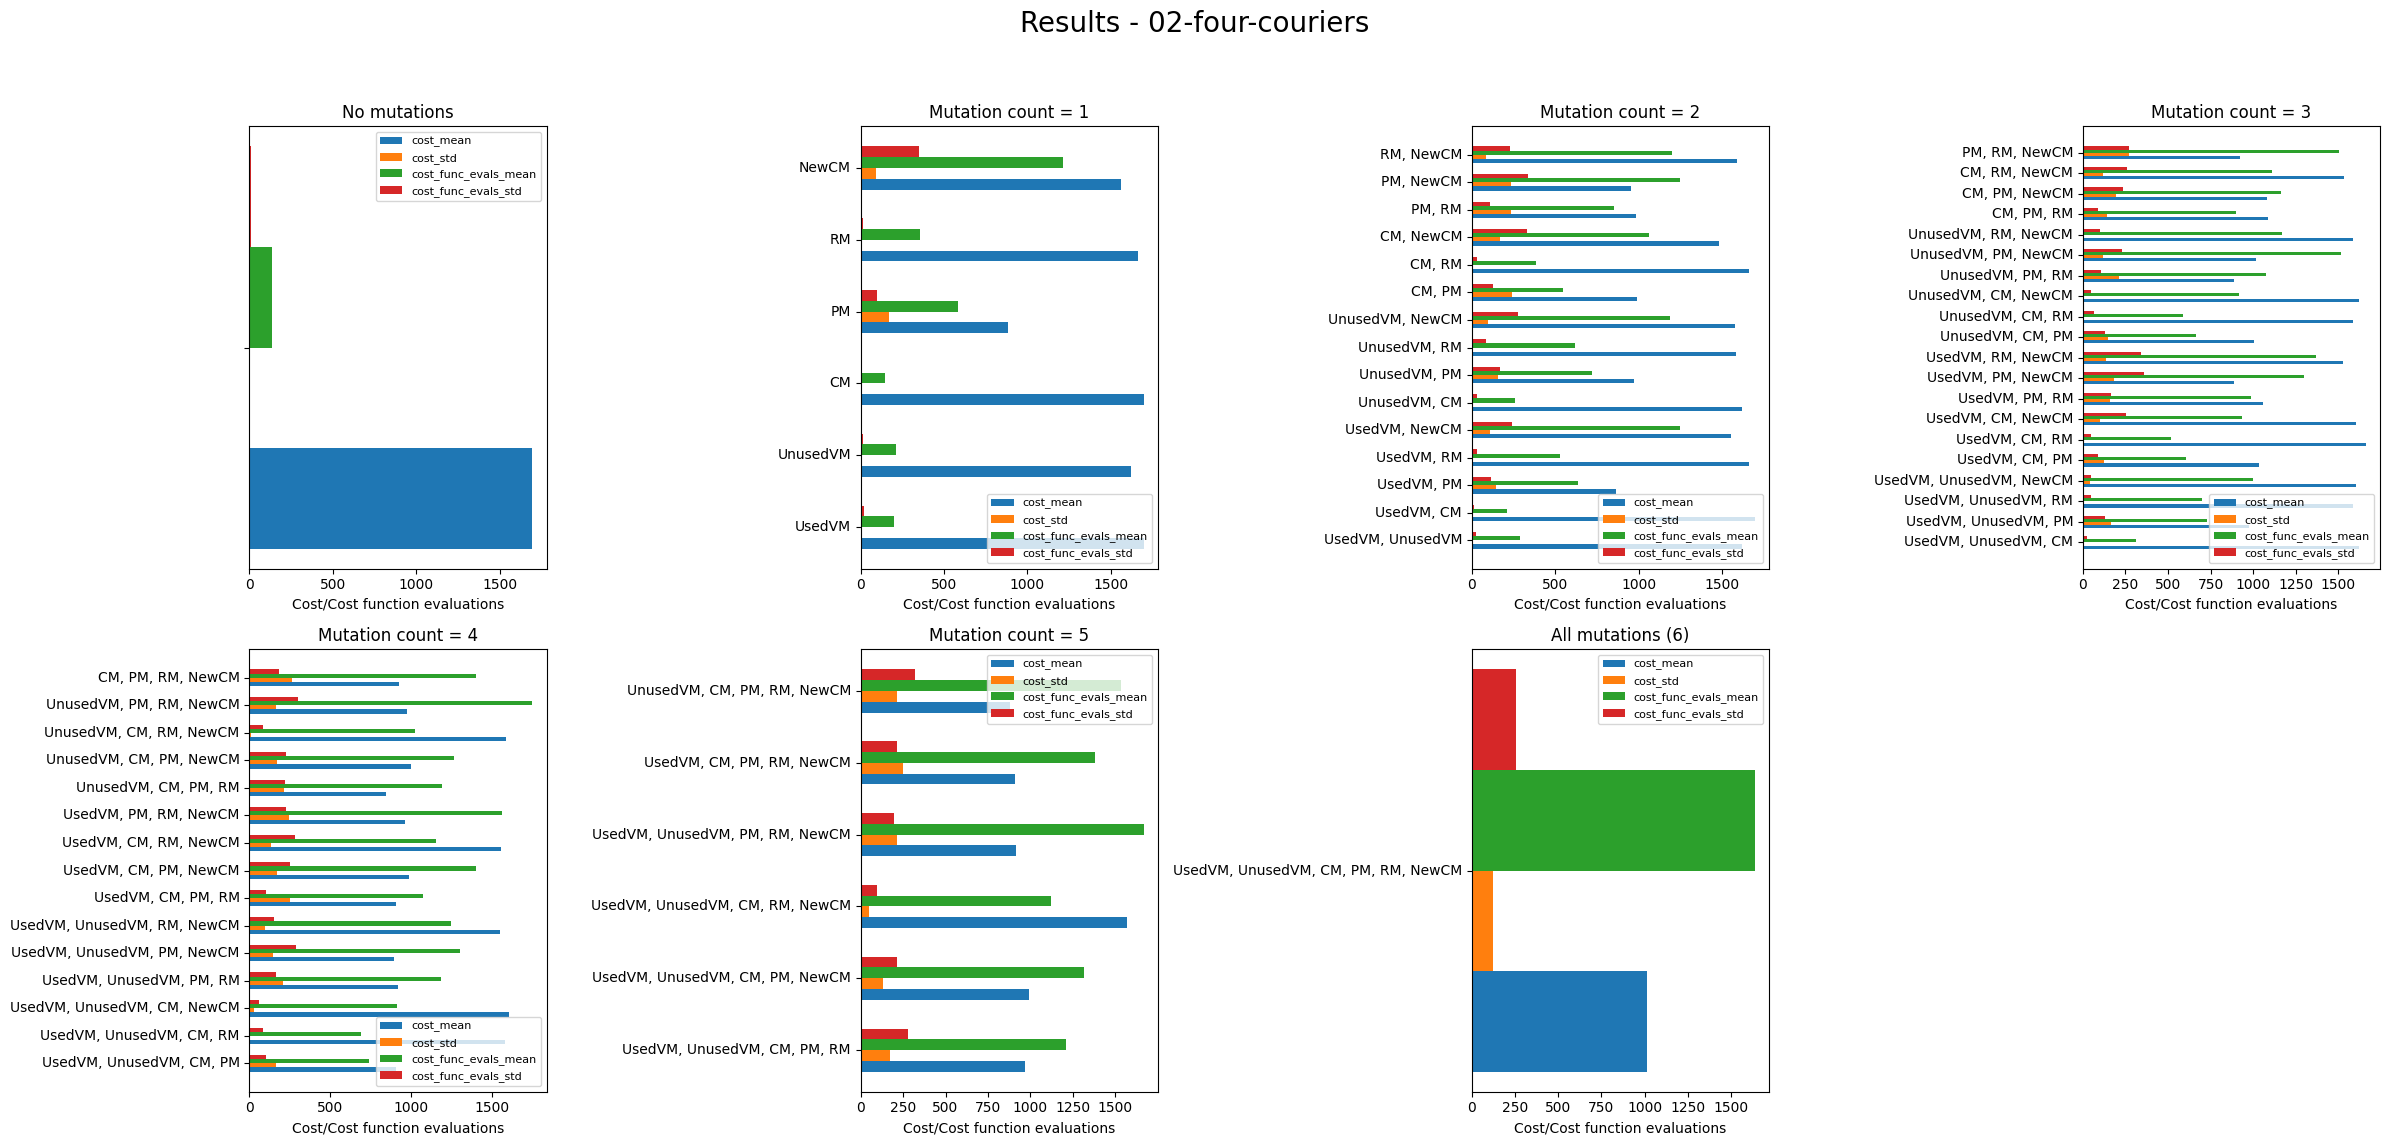

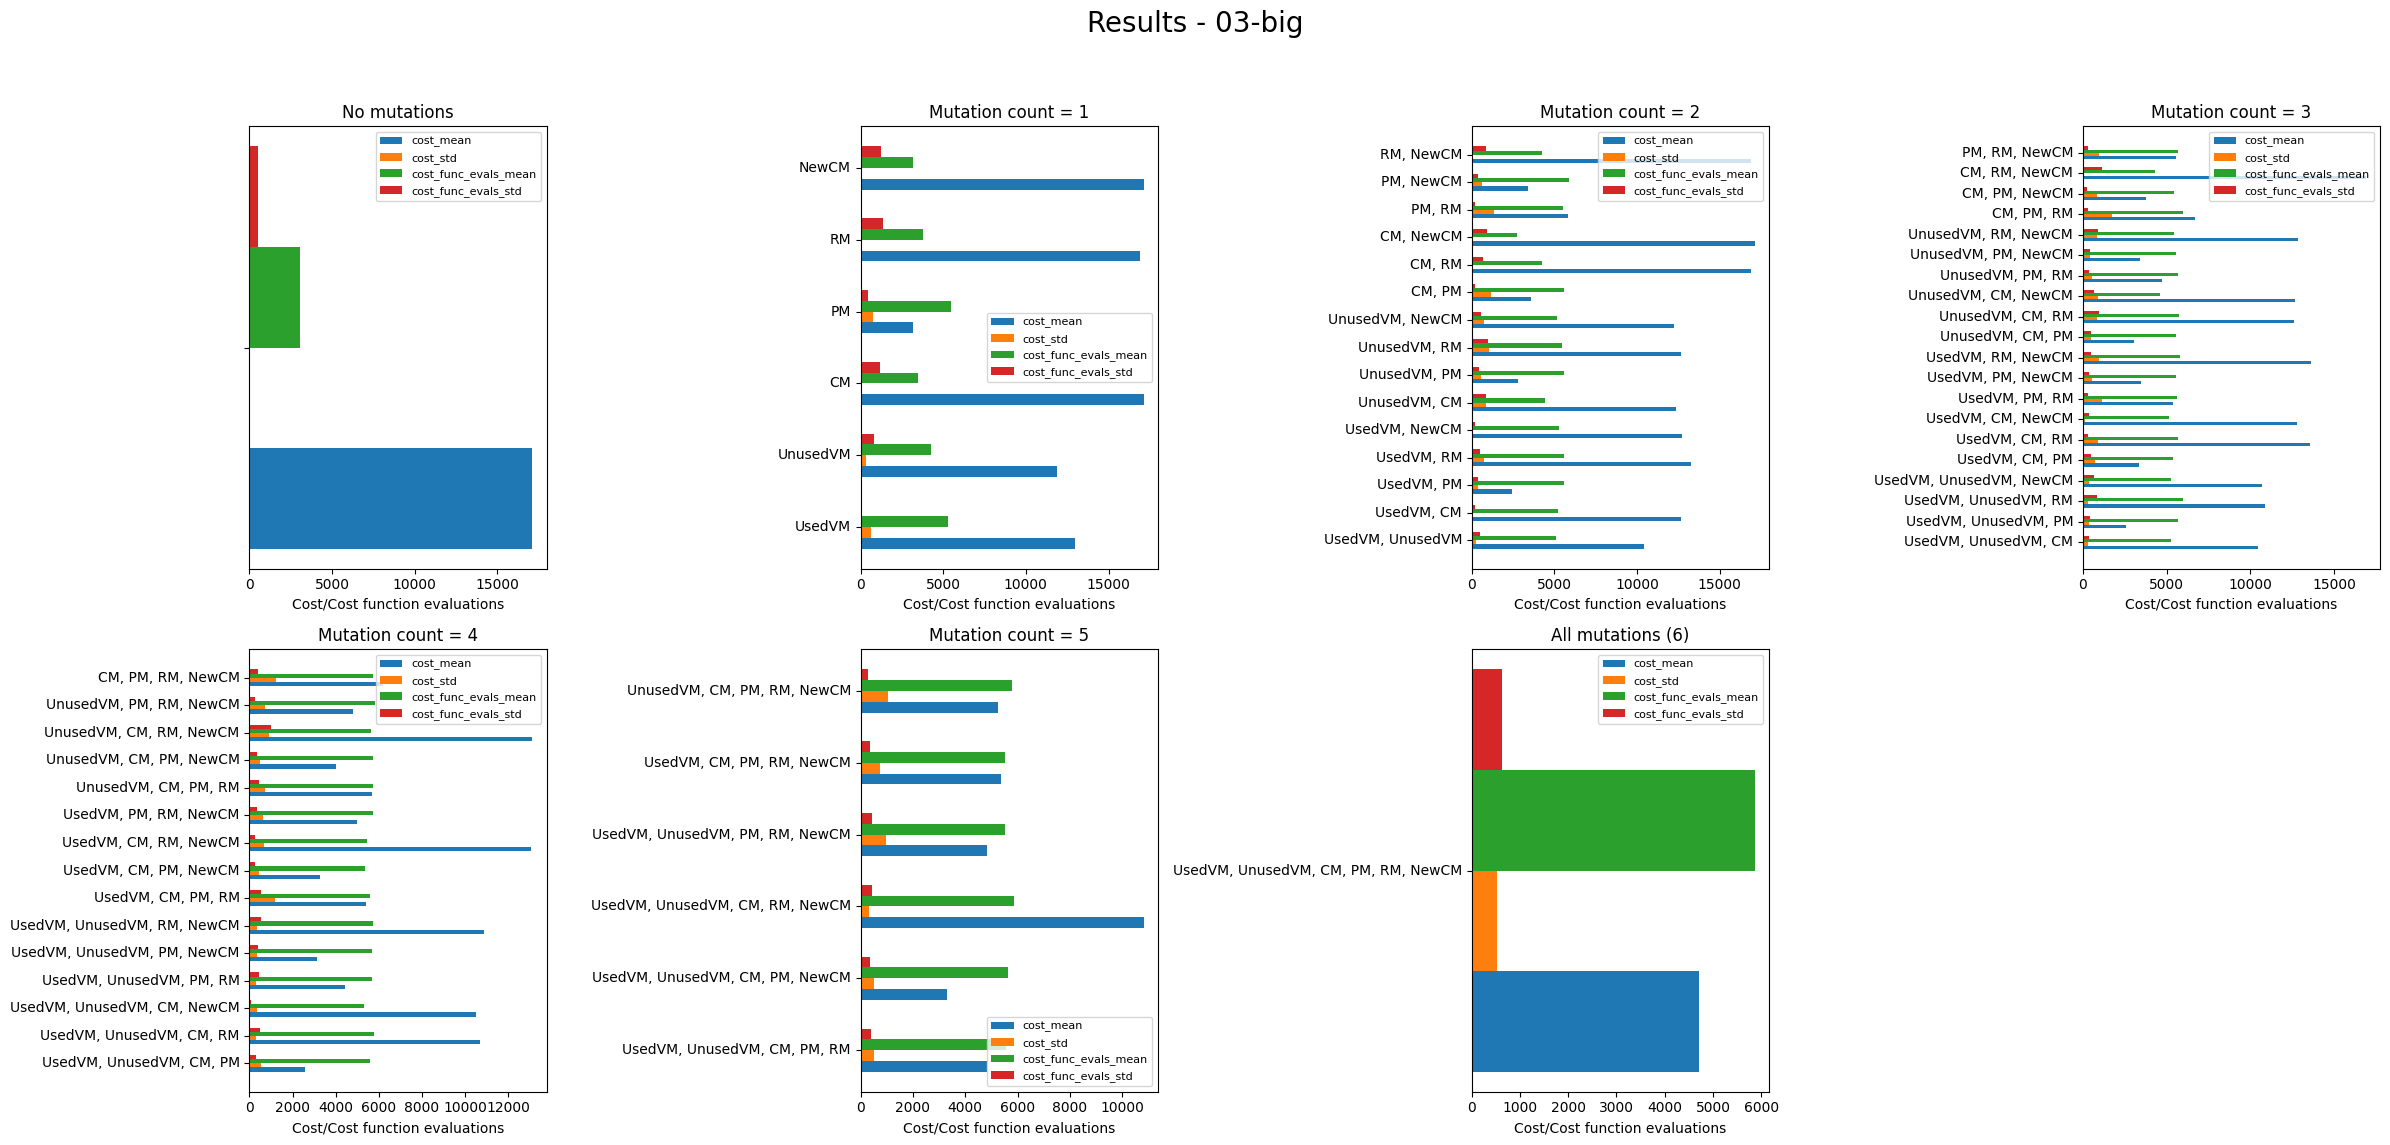

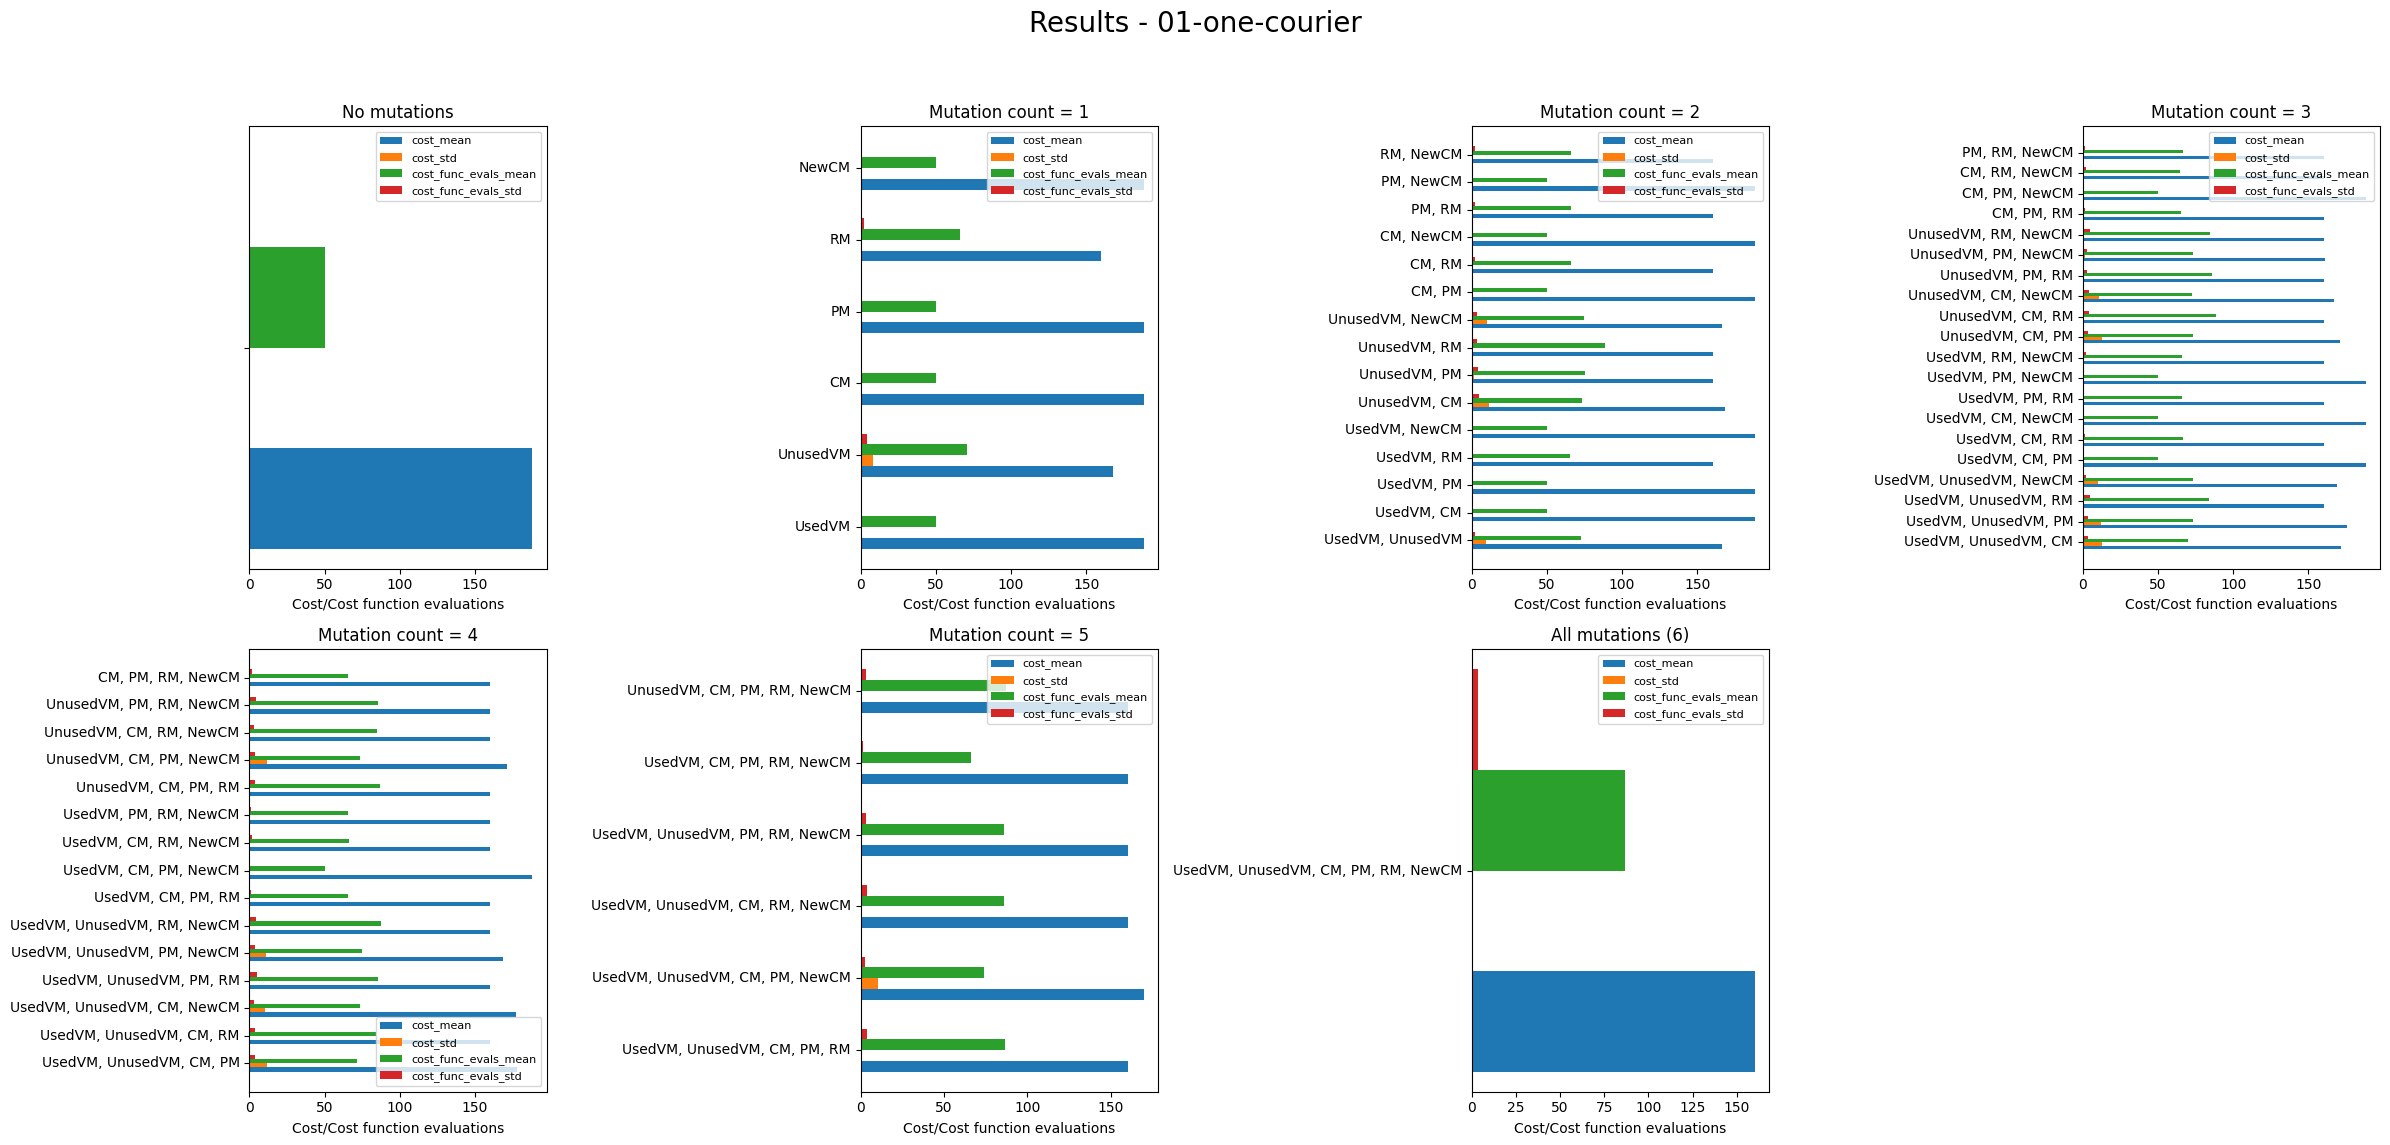

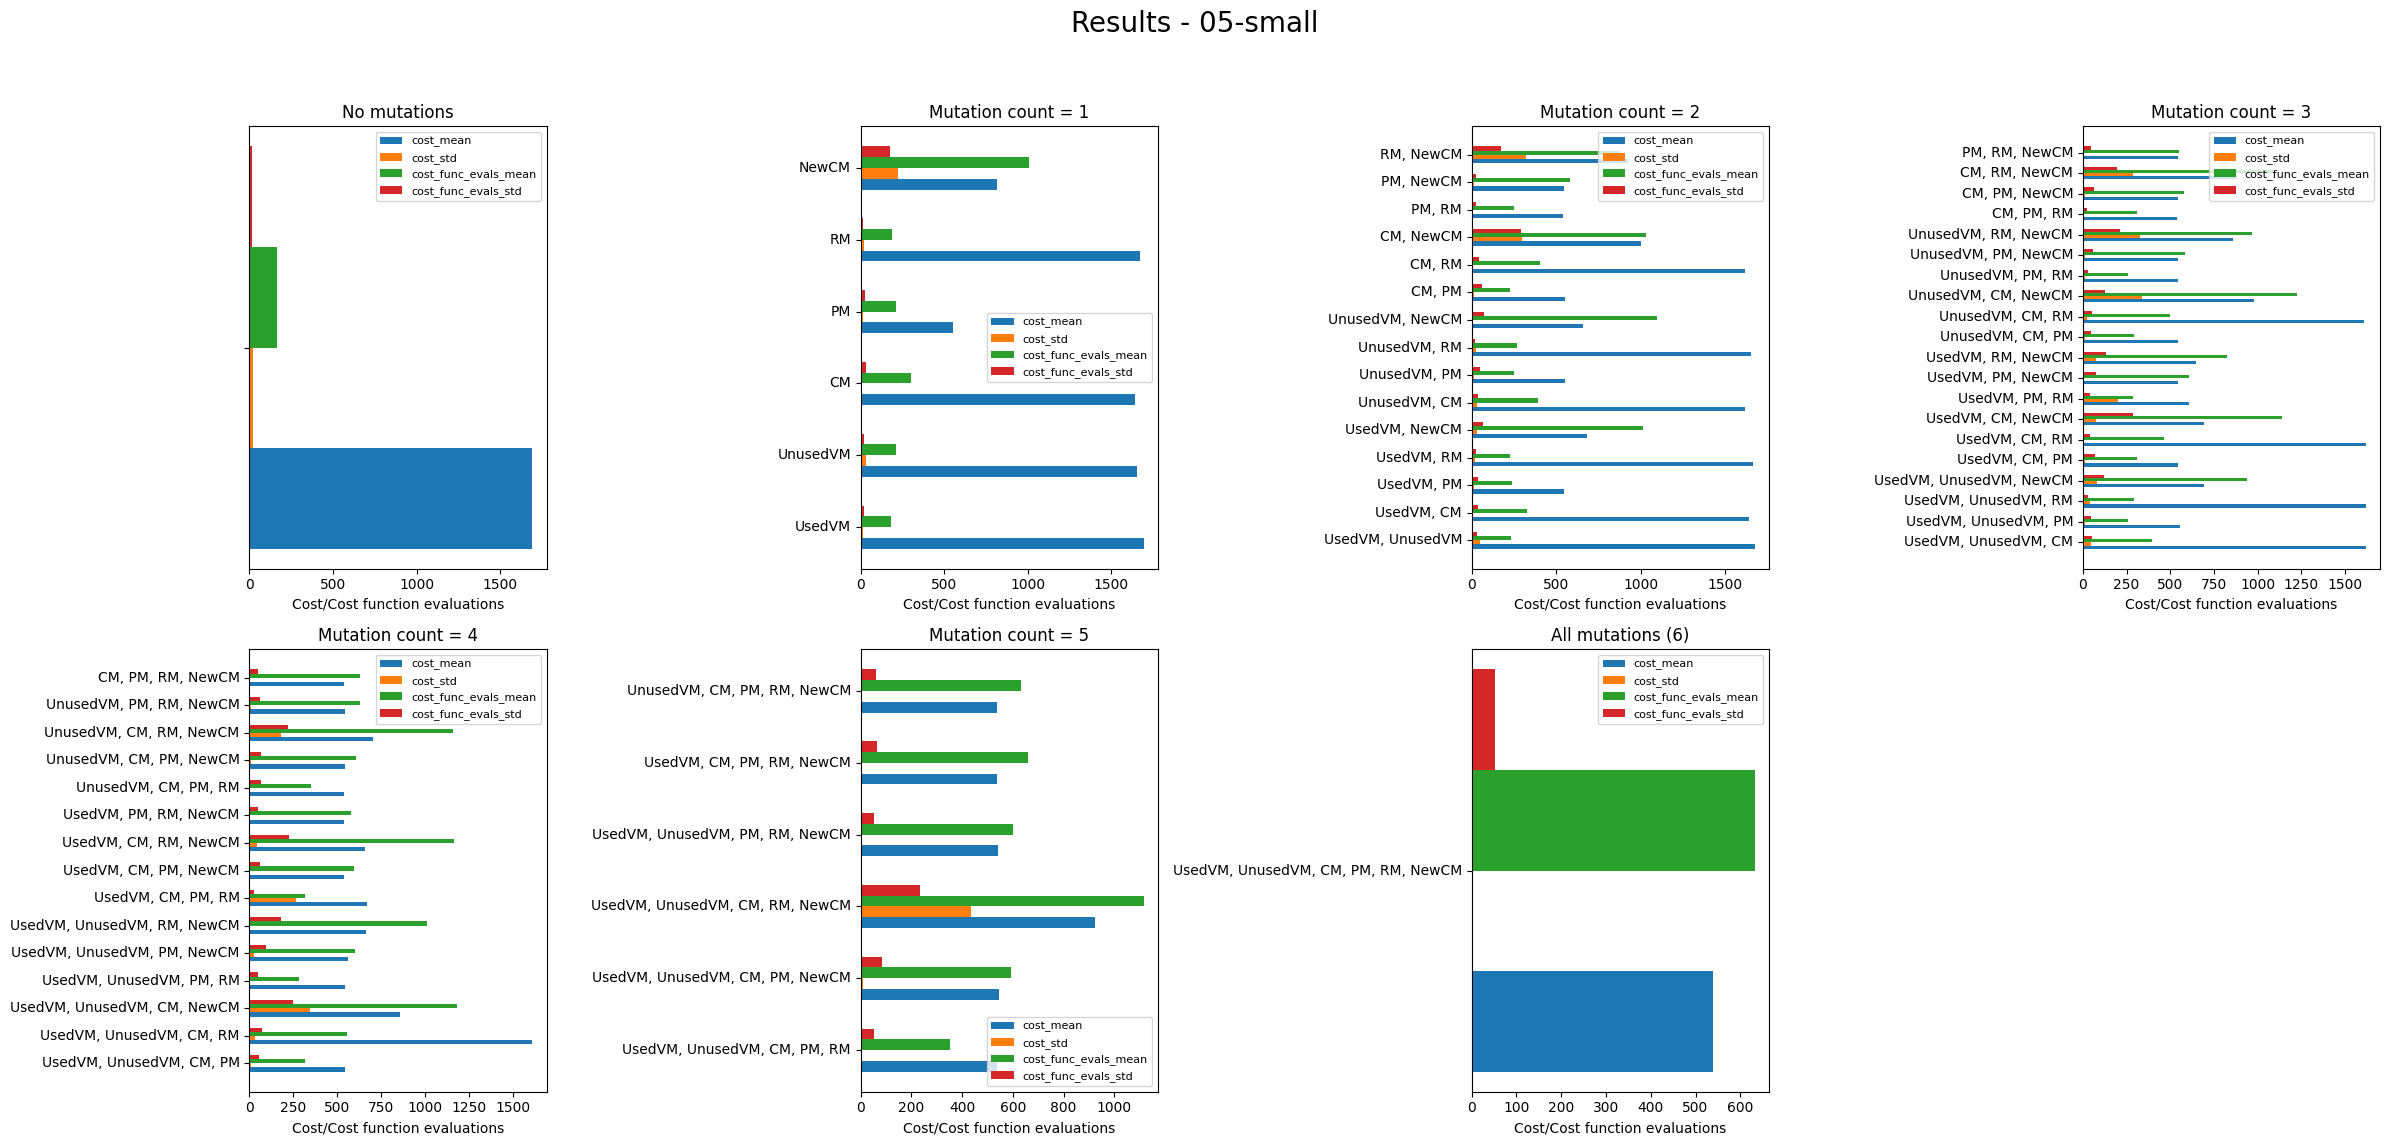

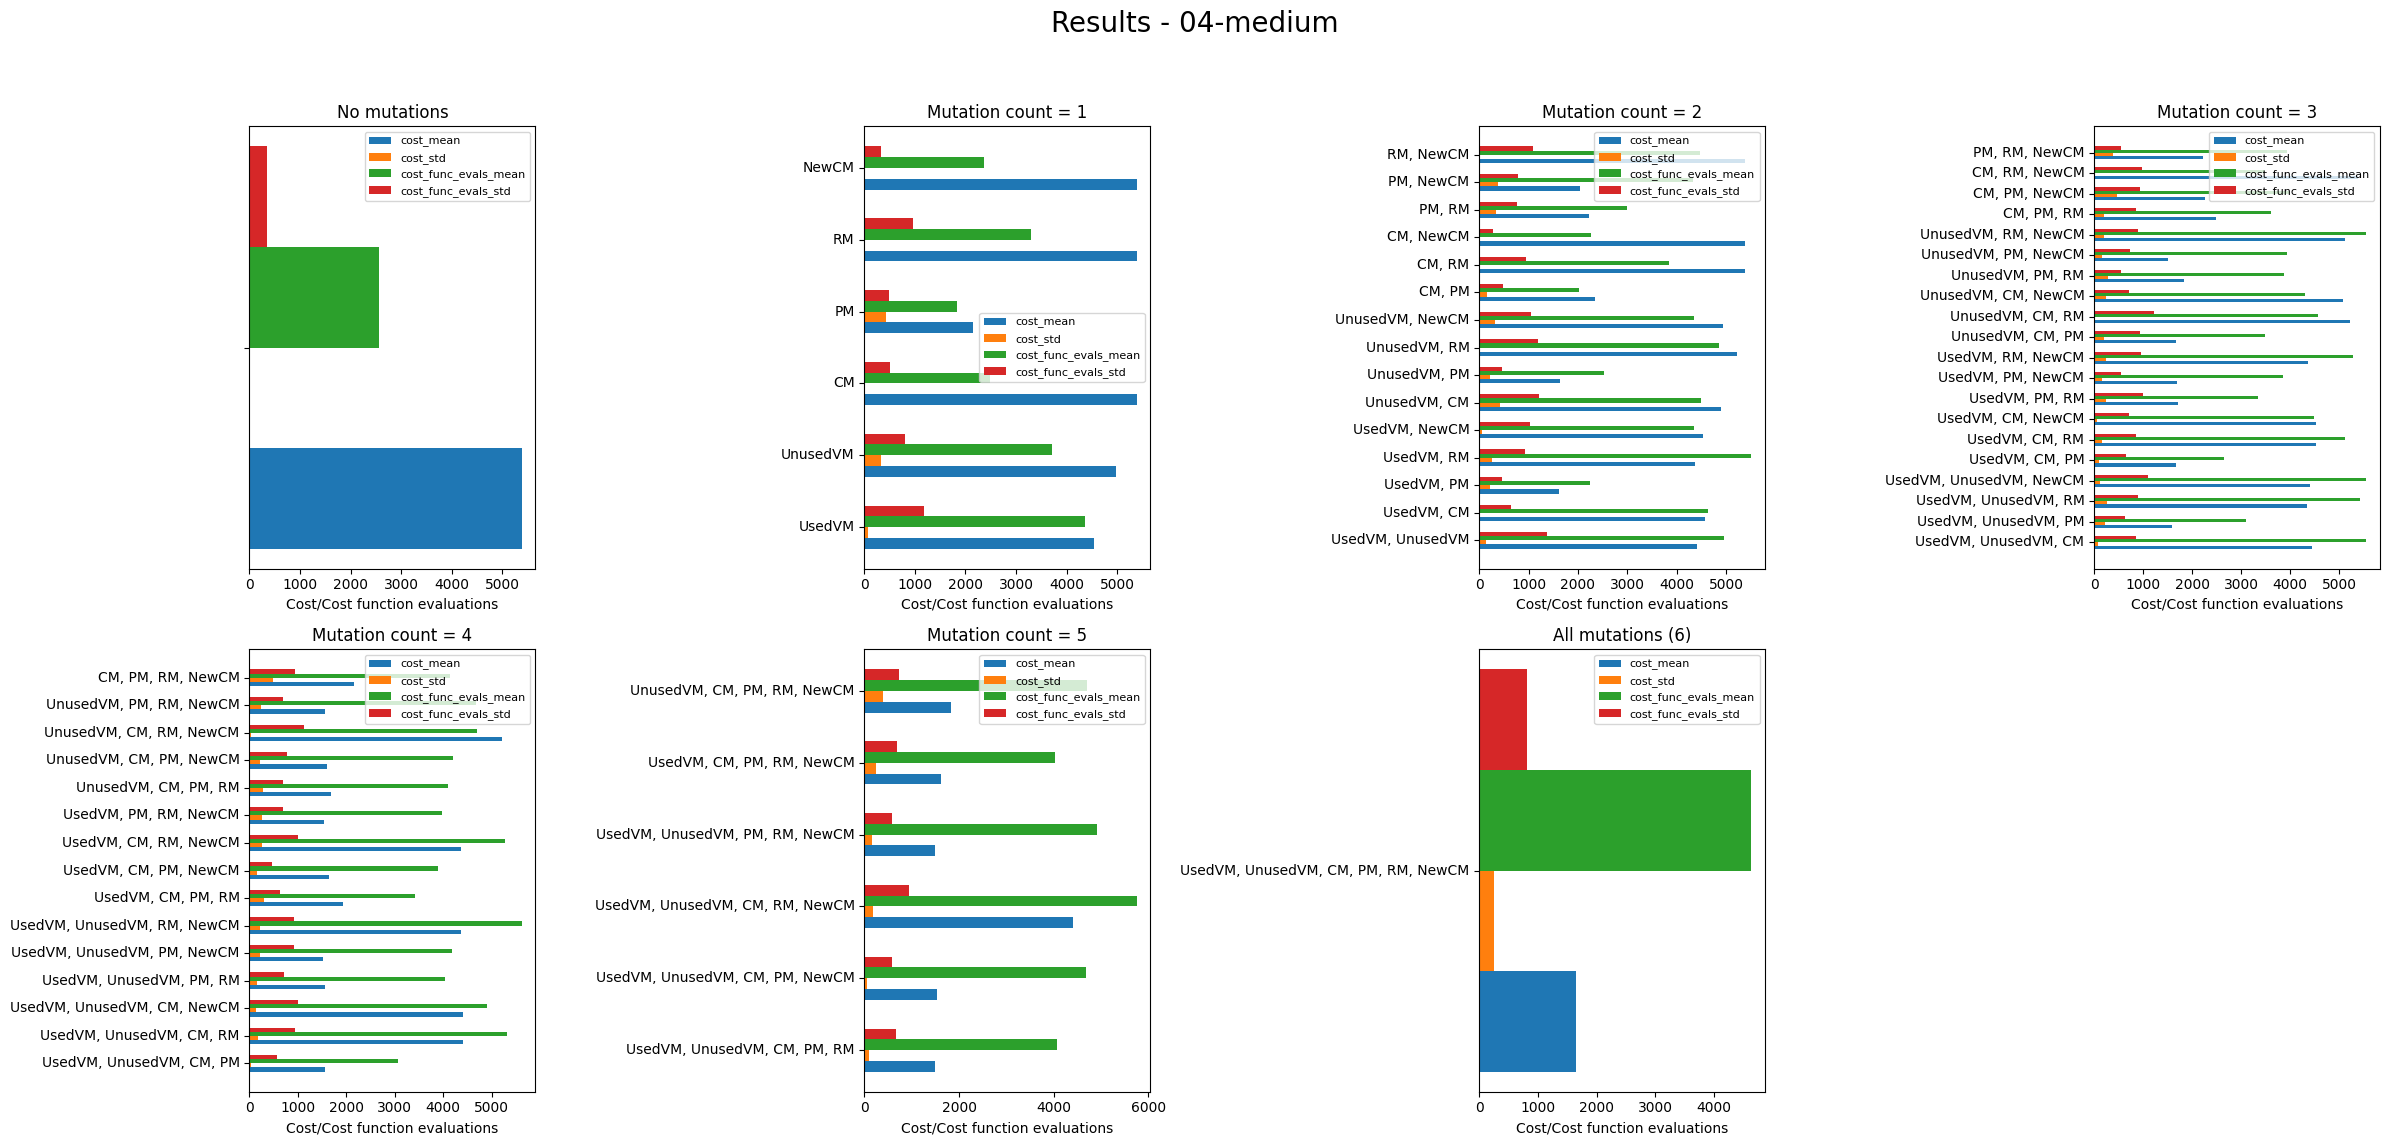

In [32]:
plot_statistics(
    results_df,
    stat_cols=["cost_mean", "cost_std", "cost_func_evals_mean", "cost_func_evals_std"],
)